<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_0_8)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/multiplication_pattern/multiplication_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.8_n20.csv',
 'data_multi_delta_-0.8_n30.csv',
 'data_multi_delta_-0.8_n60.csv',
 'data_multi_delta_-0.8_n120.csv',
 'data_multi_delta_-0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,86.830578,29.431123,64.118923,-0.223700,190.156924,190.367630,-0.210706
1,0.0,1.0,32.249187,45.889157,27.959034,-0.060041,116.037336,116.091860,-0.054523
2,0.0,2.0,30.486996,28.529001,57.146174,0.083665,126.245835,126.153580,0.092255
3,0.0,3.0,68.486188,46.733782,78.618434,0.002182,203.840585,203.829937,0.010649
4,0.0,4.0,92.326149,98.667386,52.917565,-0.005141,253.905959,253.910108,-0.004149
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,54.135144,90.033341,54.848925,-0.045869,208.971541,209.019244,-0.047704
249996,999.0,246.0,45.648679,34.490893,28.783043,0.021708,118.944323,118.929302,0.015021
249997,999.0,247.0,79.759844,58.387437,86.801333,0.051313,234.999927,234.946644,0.053283
249998,999.0,248.0,88.154822,26.248024,82.436424,0.134558,206.973828,206.837650,0.136178


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,86.830578,29.431123,64.118923,-0.223700,190.156924,190.367630,-0.210706
1,0.0,1.0,32.249187,45.889157,27.959034,-0.060041,116.037336,116.091860,-0.054523
2,0.0,2.0,30.486996,28.529001,57.146174,0.083665,126.245835,126.153580,0.092255
3,0.0,3.0,68.486188,46.733782,78.618434,0.002182,203.840585,203.829937,0.010649
4,0.0,4.0,92.326149,98.667386,52.917565,-0.005141,253.905959,253.910108,-0.004149
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,54.135144,90.033341,54.848925,-0.045869,208.971541,209.019244,-0.047704
249996,999.0,246.0,45.648679,34.490893,28.783043,0.021708,118.944323,118.929302,0.015021
249997,999.0,247.0,79.759844,58.387437,86.801333,0.051313,234.999927,234.946644,0.053283
249998,999.0,248.0,88.154822,26.248024,82.436424,0.134558,206.973828,206.837650,0.136178


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    86.830578  29.431123  64.118923  ...  190.156924  190.367630 -0.210706
      1.0    32.249187  45.889157  27.959034  ...  116.037336  116.091860 -0.054523
      2.0    30.486996  28.529001  57.146174  ...  126.245835  126.153580  0.092255
      3.0    68.486188  46.733782  78.618434  ...  203.840585  203.829937  0.010649
      4.0    92.326149  98.667386  52.917565  ...  253.905959  253.910108 -0.004149
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  54.135144  90.033341  54.848925  ...  208.971541  209.019244 -0.047704
      246.0  45.648679  34.490893  28.783043  ...  118.944323  118.929302  0.015021
      247.0  79.759844  58.387437  86.801333  ...  234.999927  234.946644  0.053283
      248.0  88.154822  26.248024  82.436424  ...  206.973828  206.837650  0.136178
      249.0  34.498185  64.771095  69.551016  ...  178.706706  178.825592 -0.118886

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    86.830578  29.431123  64.118923  ...  190.156924  190.367630 -0.210706
      1.0    32.249187  45.889157  27.959034  ...  116.037336  116.091860 -0.054523
      2.0    30.486996  28.529001  57.146174  ...  126.245835  126.153580  0.092255
      3.0    68.486188  46.733782  78.618434  ...  203.840585  203.829937  0.010649
      4.0    92.326149  98.667386  52.917565  ...  253.905959  253.910108 -0.004149
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  54.135144  90.033341  54.848925  ...  208.971541  209.019244 -0.047704
      246.0  45.648679  34.490893  28.783043  ...  118.944323  118.929302  0.015021
      247.0  79.759844  58.387437  86.801333  ...  234.999927  234.946644  0.053283
      248.0  88.154822  26.248024  82.436424  ...  206.973828  206.837650  0.136178
      249.0  34.498185  64.771095  69.551016  ...  178.706706  178.825592 -0.118886

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,86.830578,29.431123,64.118923,-0.223700,190.156924,190.367630,-0.210706
1,0.0,1.0,32.249187,45.889157,27.959034,-0.060041,116.037336,116.091860,-0.054523
2,0.0,2.0,30.486996,28.529001,57.146174,0.083665,126.245835,126.153580,0.092255
3,0.0,3.0,68.486188,46.733782,78.618434,0.002182,203.840585,203.829937,0.010649
4,0.0,4.0,92.326149,98.667386,52.917565,-0.005141,253.905959,253.910108,-0.004149
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,54.135144,90.033341,54.848925,-0.045869,208.971541,209.019244,-0.047704
249996,999.0,246.0,45.648679,34.490893,28.783043,0.021708,118.944323,118.929302,0.015021
249997,999.0,247.0,79.759844,58.387437,86.801333,0.051313,234.999927,234.946644,0.053283
249998,999.0,248.0,88.154822,26.248024,82.436424,0.134558,206.973828,206.837650,0.136178


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    86.830578  29.431123  64.118923  ...  190.156924  190.367630 -0.210706
      1.0    32.249187  45.889157  27.959034  ...  116.037336  116.091860 -0.054523
      2.0    30.486996  28.529001  57.146174  ...  126.245835  126.153580  0.092255
      3.0    68.486188  46.733782  78.618434  ...  203.840585  203.829937  0.010649
      4.0    92.326149  98.667386  52.917565  ...  253.905959  253.910108 -0.004149
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  54.135144  90.033341  54.848925  ...  208.971541  209.019244 -0.047704
      246.0  45.648679  34.490893  28.783043  ...  118.944323  118.929302  0.015021
      247.0  79.759844  58.387437  86.801333  ...  234.999927  234.946644  0.053283
      248.0  88.154822  26.248024  82.436424  ...  206.973828  206.837650  0.136178
      249.0  34.498185  64.771095  69.551016  ...  178.706706  178.825592 -0.118886

[250000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

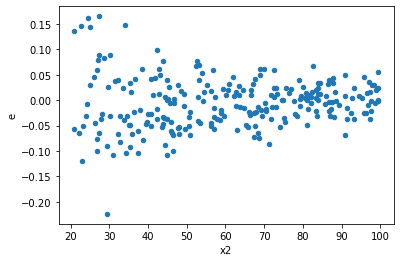

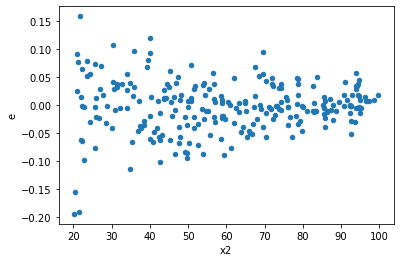

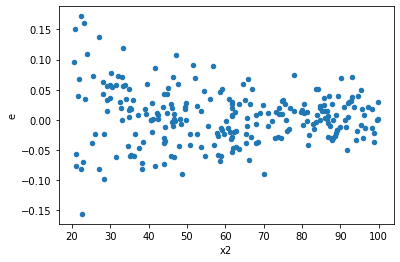

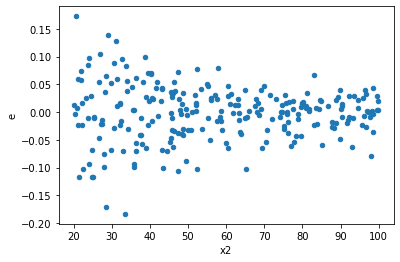

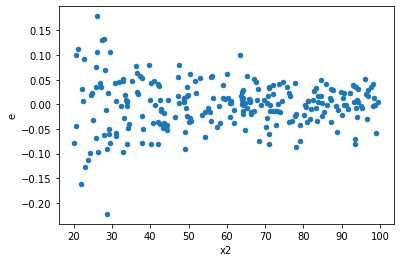

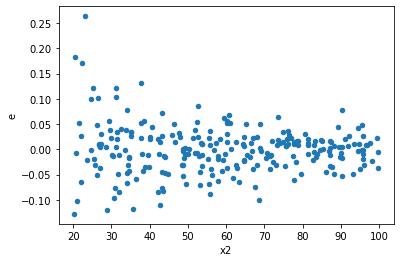

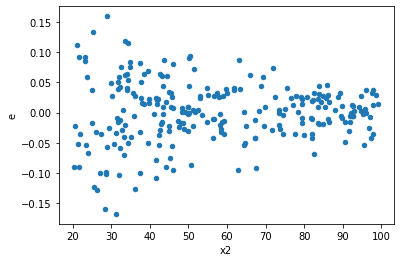

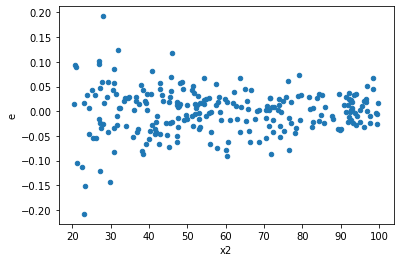

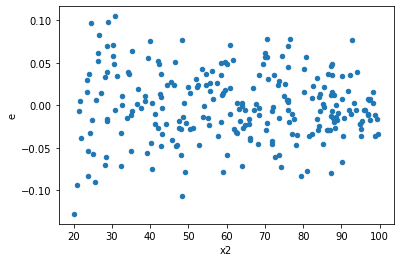

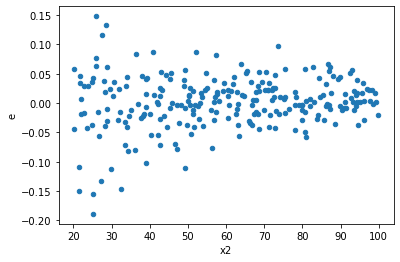

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,0.09091041671681835,0.45090360723191136,0.0009469835074668578,0.00469691257533241,0.201618295482078,6.484283779019392e-14,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,0.07565865421404669,0.3765407386637918,0.0007881109813963196,0.003922299361081165,0.200930859387306,5.800077135104049e-14,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,0.07698807263976194,0.33984254974298794,0.0008019590899975203,0.003540026559822791,0.22654041613678325,2.652169011637187e-12,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,0.08531583883423172,0.43914865536295444,0.0008887066545232471,0.004574465160030776,0.19427553242470602,1.915562961386885e-14,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,0.09722956356346102,0.4272016504980786,0.0010128079537860522,0.004450017192688319,0.2275964136610898,3.063552350258975e-12,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,0.07988966619995266,0.3864635089854927,0.0008321840229161735,0.004025661551932216,0.20671981789347052,1.4592960971978908e-13,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,0.10204938279354428,0.4307184471792518,0.0010630144040994197,0.004486650491450539,0.23692828450199735,1.0513606925947404e-11,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,0.08626431976796267,0.37698609325899884,0.0008985866642496112,0.003926938471447905,0.22882626524023242,3.6193276206515127e-12,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,0.10885744470966983,0.22172609572184668,0.0011339317157257275,0.002309646830435903,0.490954591318067,0.000543185469627969,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64

In [18]:
result_show['Result_test'].sort_values()

Replicate
0.0      Reject001=0 : Heteroscedasticity
658.0    Reject001=0 : Heteroscedasticity
659.0    Reject001=0 : Heteroscedasticity
660.0    Reject001=0 : Heteroscedasticity
661.0    Reject001=0 : Heteroscedasticity
662.0    Reject001=0 : Heteroscedasticity
663.0    Reject001=0 : Heteroscedasticity
664.0    Reject001=0 : Heteroscedasticity
665.0    Reject001=0 : Heteroscedasticity
666.0    Reject001=0 : Heteroscedasticity
667.0    Reject001=0 : Heteroscedasticity
668.0    Reject001=0 : Heteroscedasticity
669.0    Reject001=0 : Heteroscedasticity
670.0    Reject001=0 : Heteroscedasticity
671.0    Reject001=0 : Heteroscedasticity
672.0    Reject001=0 : Heteroscedasticity
673.0    Reject001=0 : Heteroscedasticity
674.0    Reject001=0 : Heteroscedasticity
675.0    Reject001=0 : Heteroscedasticity
676.0    Reject001=0 : Heteroscedasticity
677.0    Reject001=0 : Heteroscedasticity
678.0    Reject001=0 : Heteroscedasticity
679.0    Reject001=0 : Heteroscedasticity
680.0    Reject001=0 : H